In [9]:
# Token vector

import spacy
nlp = spacy.load("en_core_web_md")

doc = nlp("I ate a banana")

doc[3].vector


array([ 2.0228e-01, -7.6618e-02,  3.7032e-01,  3.2845e-02, -4.1957e-01,
        7.2069e-02, -3.7476e-01,  5.7460e-02, -1.2401e-02,  5.2949e-01,
       -5.2380e-01, -1.9771e-01, -3.4147e-01,  5.3317e-01, -2.5331e-02,
        1.7380e-01,  1.6772e-01,  8.3984e-01,  5.5107e-02,  1.0547e-01,
        3.7872e-01,  2.4275e-01,  1.4745e-02,  5.5951e-01,  1.2521e-01,
       -6.7596e-01,  3.5842e-01, -4.0028e-02,  9.5949e-02, -5.0690e-01,
       -8.5318e-02,  1.7980e-01,  3.3867e-01,  1.3230e-01,  3.1021e-01,
        2.1878e-01,  1.6853e-01,  1.9874e-01, -5.7385e-01, -1.0649e-01,
        2.6669e-01,  1.2838e-01, -1.2803e-01, -1.3284e-01,  1.2657e-01,
        8.6723e-01,  9.6721e-02,  4.8306e-01,  2.1271e-01, -5.4990e-02,
       -8.2425e-02,  2.2408e-01,  2.3975e-01, -6.2260e-02,  6.2194e-01,
       -5.9900e-01,  4.3201e-01,  2.8143e-01,  3.3842e-02, -4.8815e-01,
       -2.1359e-01,  2.7401e-01,  2.4095e-01,  4.5950e-01, -1.8605e-01,
       -1.0497e+00, -9.7305e-02, -1.8908e-01, -7.0929e-01,  4.01

In [10]:
import spacy
nlp = spacy.load("en_core_web_md")

doc = nlp("I ate a banana")

print(type(doc[3].vector))

doc[3].vector.shape

<class 'numpy.ndarray'>


(300,)

In [11]:
# Span Vector

import spacy
nlp = spacy.load("en_core_web_md")

doc = nlp("I like a banana,")

doc.vector

doc[1:3].vector

array([-7.01859966e-02,  3.99469994e-02, -2.89449990e-01,  1.44250005e-01,
        3.08454990e-01, -3.68050039e-02,  5.54560013e-02, -3.84959996e-01,
       -1.67619996e-02,  2.18615007e+00, -2.49925002e-01, -6.11364990e-02,
        1.29144996e-01, -4.81765009e-02, -2.66460001e-01, -6.00790009e-02,
        5.89450002e-02,  1.18259001e+00, -2.54125506e-01, -7.12940022e-02,
       -4.14670035e-02, -2.59229988e-01, -2.93590009e-01,  1.39931455e-01,
       -3.80499959e-02, -2.37364992e-02, -3.13300081e-03, -1.39875501e-01,
        3.56814981e-01, -1.68979496e-01,  1.09136999e-01,  2.14434996e-01,
       -1.16950013e-02, -1.45829991e-02,  3.03380013e-01, -2.41475001e-01,
        1.53072998e-01, -6.51900023e-02, -2.27335006e-01, -3.70322496e-01,
        8.24549943e-02,  4.37065005e-01, -8.23500007e-03, -1.57661155e-01,
        1.33170500e-01, -2.15614997e-02, -3.75005007e-01, -1.87555000e-01,
       -9.86540020e-02,  1.52085498e-01, -3.38850021e-01,  4.04414982e-01,
        2.83199996e-02,  

In [14]:
# whether has vector

import spacy
nlp = spacy.load("en_core_web_md")

doc = nlp("You went there afskfd.")

for token in doc:
    print(token.is_oov,token.has_vector)
    

False True
False True
False True
True False
False True


In [15]:
# Similarity

import spacy
nlp = spacy.load("en_core_web_md")

doc1 = nlp("I visited England.")

doc2 = nlp("I went to London.")

doc1[2].similarity(doc2[3])

0.7389128

In [16]:
import spacy
nlp = spacy.load("en_core_web_md")

doc1 = nlp("I visited England.")

doc2 = nlp("I went to London.")

doc1.similarity(doc1)

1.0

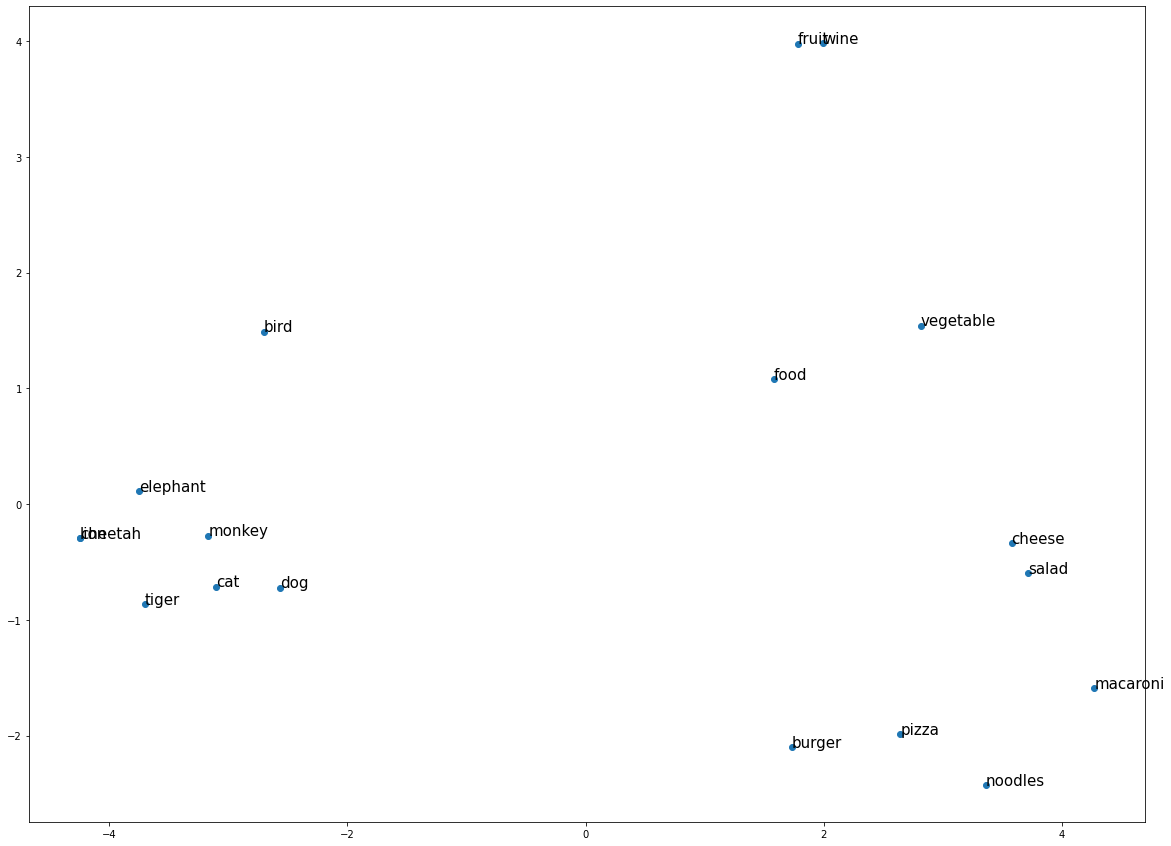

In [20]:
# Vector Analysis

import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
import numpy as np 
import spacy 

nlp = spacy.load("en_core_web_md") 

vocab = nlp("cat dog tiger elephant bird monkey lion cheetah burger pizza food cheese wine salad noodles macaroni fruit vegetable") 

words = [word.text for word in vocab] 
vecs = np.vstack([word.vector for word in vocab if word.has_vector]) 
pca = PCA(n_components=2) 
vecs_transformed = pca.fit_transform(vecs) 
plt.figure(figsize=(20,15)) 
plt.scatter(vecs_transformed[:,0], vecs_transformed[:,1]) 
for word, coord in zip(words, vecs_transformed): 
    x,y = coord 
    plt.text(x,y,word, size=15) 

plt.show() 

In [27]:
# Categorizing Text With Semantic Similarity

import spacy
nlp = spacy.load("en_core_web_md")

sentences = nlp("I purchased a science fiction book last week. I loved everything related to this fragrance: light, floral and feminine... I purchased a bottle of wine.  ")

key = nlp("perfume")

for sent in sentences.sents:
    print(sent.similarity(key))

0.24816539868039925
0.5075297559861377
0.4215429797282666
0.0


/var/folders/wr/cq3b843s7ylgsg1x4pcn11dm0000gn/T/ipykernel_7236/3486323379.py:11: UserWarning: [W008] Evaluating Span.similarity based on empty vectors.
  print(sent.similarity(key))


In [28]:
# Categorizing Text With Semantic Similarity

import spacy
nlp = spacy.load("en_core_web_md")

sentences = nlp("I purchased a science fiction book last week. I loved everything related to this fragrance: light, floral and feminine... I purchased a bottle of wine.  ")

key = nlp("lesson")

for sent in sentences.sents:
    print(sent.similarity(key))

0.5050322339530249
0.4117777517399831
0.35624543595566677
0.0


/var/folders/wr/cq3b843s7ylgsg1x4pcn11dm0000gn/T/ipykernel_7236/1810454331.py:11: UserWarning: [W008] Evaluating Span.similarity based on empty vectors.
  print(sent.similarity(key))


In [1]:
# Categorizing Text With Semantic Similarity

import spacy
nlp = spacy.load("en_core_web_md")

sentences = nlp("I purchased a science fiction book last week. I loved everything related to this fragrance: light, floral and feminine... I purchased a bottle of wine.  ")

key = nlp("beer")

for sent in sentences.sents:
    print(sent.similarity(key))

0.3663267105529687
0.39169649416137886
0.6226196882011188
0.0


/var/folders/wr/cq3b843s7ylgsg1x4pcn11dm0000gn/T/ipykernel_4541/1777953029.py:11: UserWarning: [W008] Evaluating Span.similarity based on empty vectors.
  print(sent.similarity(key))


In [2]:
# Extracting Key(Noun) Phrases

import spacy
nlp = spacy.load("en_core_web_md")

doc = nlp("My beautiful and cute dog jumped over the fence")
doc.noun_chunks

list(doc.noun_chunks)



[My beautiful and cute dog, the fence]

In [7]:
import spacy
nlp = spacy.load("en_core_web_md")
sentences = nlp("I purchased a science fiction book last week. I loved everything related to this fragrance: light, floral and feminine... I purchased a bottle of wine.  ")
for sent in sentences.sents:
    nchunks = [nchunk.text for nchunk in sent.noun_chunks]
    nchunk_doc = nlp(" ".join(nchunks))
    print(nchunk_doc.similarity(key))

0.30120441357803307
0.3871896705857669
0.6790471299678063


ValueError: Shape mismatch for blis.gemm: (0, 0), (576, 288)

In [24]:
# Entity Similarity in Texts


import spacy
nlp = spacy.load("en_core_web_md")

doc1 =  nlp("Google Search, often referred as Google, is the most popular search engine nowadays. It answers a huge volume of queries every day.")

doc2 = nlp("Microsoft Bing is another popular search engine. Microsoft is known by its star product Microsoft Windows, a popular operating system sold over the world.")

doc3 = nlp("The Dead Sea is the lowest lake in the world, located in the Jordan Valley of Israel. It is also the saltiest lake in the world.")

# This creates tuples

print(doc1.ents)
print(doc2.ents)
print(doc3.ents)

# Make list from tuples

ents1 = [ent.text for ent in doc1.ents]
print(ents1)
ents2 = [ent.text for ent in doc2.ents]
print(ents2)
ents3 = [ent.text for ent in doc3.ents]
print(ents3)

# Make a text from list

ents1 = nlp(" ".join(ents1))
print(ents1)
ents2 = nlp(" ".join(ents2))
print(ents2)
ents3 = nlp(" ".join(ents3))
print(ents3)

print(ents1.similarity(ents2))
print(ents1.similarity(ents3))
print(ents2.similarity(ents3))


(Google Search, Google, every day)
(Microsoft Bing, Microsoft, Microsoft Windows)
(the Jordan Valley, Israel)
['Google Search', 'Google', 'every day']
['Microsoft Bing', 'Microsoft', 'Microsoft Windows']
['the Jordan Valley', 'Israel']
Google Search Google every day
Microsoft Bing Microsoft Microsoft Windows
the Jordan Valley Israel
0.5394545697831438
0.48605042335384385
0.39674956866863936


In [29]:
# Entity Similarity in Texts (Test)


import spacy
nlp = spacy.load("en_core_web_md")

doc1 =  nlp("Google Search, often referred as Google, is the most popular search engine nowadays. It answers a huge volume of queries every day.")

doc2 = nlp("Microsoft Bing is another popular search engine. Microsoft is known by its star product Microsoft Windows, a popular operating system sold over the world.")

doc3 = nlp("The Dead Sea is the lowest lake in the world, located in the Jordan Valley of Israel. It is also the saltiest lake in the world.")

print(doc1.ents)
print(doc2.ents)
print(doc3.ents)


print(doc1.ents.similarity(doc2.ents))

(Google Search, Google, every day)
(Microsoft Bing, Microsoft, Microsoft Windows)
(the Jordan Valley, Israel)


AttributeError: 'tuple' object has no attribute 'similarity'

In [27]:
# Entity Similarity in Texts (Test)


import spacy
nlp = spacy.load("en_core_web_md")

doc1 =  nlp("Google Search, often referred as Google, is the most popular search engine nowadays. It answers a huge volume of queries every day.")

doc2 = nlp("Microsoft Bing is another popular search engine. Microsoft is known by its star product Microsoft Windows, a popular operating system sold over the world.")

doc3 = nlp("The Dead Sea is the lowest lake in the world, located in the Jordan Valley of Israel. It is also the saltiest lake in the world.")

print(doc1.ents)
print(doc2.ents)
print(doc3.ents)


ents1 = [ent.text for ent in doc1.ents]
print(ents1)
ents2 = [ent.text for ent in doc2.ents]
print(ents2)
ents3 = [ent.text for ent in doc3.ents]
print(ents3)

print(ents1.similarity(ents2))

(Google Search, Google, every day)
(Microsoft Bing, Microsoft, Microsoft Windows)
(the Jordan Valley, Israel)
['Google Search', 'Google', 'every day']
['Microsoft Bing', 'Microsoft', 'Microsoft Windows']
['the Jordan Valley', 'Israel']


AttributeError: 'list' object has no attribute 'similarity'